In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [ ]:

# headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.1 Safari/605.1.15'}

# categories = {books, watches, games, office products}
# data tags =  [ category, rating, customers related, price]

# shops (amazon, walmart, ebay)
#  amazon link (https://www.amazon.com/s?k=laptops&page=2&qid=1649209899&ref=sr_pg_1)
#  walmart link (https://www.walmart.com/search?q=video+games&sort=best_seller&page=3&affinityOverride=default)
#  ebay link (https://www.ebay.ca/sch/i.html?_from=R40&_nkw=books&_sacat=0&LH_TitleDesc=0&_pgn=2)

In [9]:
def getData(category, pageNo):
    headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.1 Safari/605.1.15',"Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

#     https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_2?ie=UTF8&pg=2
    r = requests.get('https://www.amazon.in/gp/bestsellers/'+str(category).lower()+'/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)

    # print(soup)
    alls = []
    for d in soup.findAll('div', attrs={'id':'gridItemRoot'}):
    
        name = d.find('div', attrs={'class':'a-section a-spacing-mini _p13n-zg-list-grid-desktop_maskStyle_noop__3Xbw5'})
        product_name = name.find_all('img', alt=True)
              
        rating = d.find('span', attrs={'class':'a-icon-alt'})

        price = d.find('span', attrs={'class':'_p13n-zg-list-grid-desktop_price_p13n-sc-price__3mJ9Z'})
      
        all1 = []

        if name is not None:
            all1.append(product_name[0]['alt'])
        else:
            all1.append("unknown-product")

        if rating is not None:
            all1.append(rating.text)
        else:
            all1.append('-1')

        if price is not None:
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls

print(getData("books",1))

[['Tiger of Drass: Capt. Anuj Nayyar, 23, Kargil Hero', '5.0 out of 5 stars', '₹264.00'], ['Atomic Habits: The life-changing million copy bestseller', '4.6 out of 5 stars', '₹430.00'], ['The Psychology of Money', '4.6 out of 5 stars', '₹285.00'], ['My First Library: Boxset of 10 Board Books for Kids', '4.5 out of 5 stars', '₹399.00'], ['Educart Term 2 Class 10 Sample Papers Bundle of Science, Math Standard, Social Science & English Books For 2022 (Based on the', '4.5 out of 5 stars', '₹387.00'], ['Word Power Made Easy', '4.4 out of 5 stars', '₹98.00'], ['Ikigai: The Japanese secret to a long and happy life', '4.6 out of 5 stars', '₹360.00'], ['Rich Dad Poor Dad: What the Rich Teach Their Kids About Money That the Poor and Middle Class Do Not!', '4.6 out of 5 stars', '₹302.00'], ['Mathematics for Class 10 - CBSE - by R.D. Sharma Examination 2022-23', '4.3 out of 5 stars', '₹579.00'], ['Oswaal CBSE Term 2 English Science Social Science & Math Standard Class 10 Sample Question Paper (Set 

In [45]:
def generateProductDataset(noPages, category):
    results = []
    for i in range(1, noPages+1):
        results.append(getData(category,i))
    
    flatten = lambda l: [item for sublist in l for item in sublist]
    df = pd.DataFrame(flatten(results),columns=['Product Name','Rating','Price'])
    df['shop'] = "amazon"
    df['category'] = category

    print(df.head())
    df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

generateProductDataset(2,"books")

                                        Product Name              Rating  \
0  Atomic Habits: The life-changing million copy ...  4.6 out of 5 stars   
1                            The Psychology of Money  4.6 out of 5 stars   
2  Oswaal CBSE Term 2 English Science Social Scie...  4.7 out of 5 stars   
3  Mathematics for Class 10 - CBSE - by R.D. Shar...  4.3 out of 5 stars   
4  Educart Term 2 Class 10 Sample Papers Bundle o...  4.5 out of 5 stars   

     Price    shop category  
0  ₹430.00  amazon    books  
1  ₹321.00  amazon    books  
2  ₹419.00  amazon    books  
3  ₹579.00  amazon    books  
4  ₹387.00  amazon    books  


In [43]:
def readProductDataset(filename):
    df = pd.read_csv(filename)
    return df

readProductDataset("amazon_products.csv")

,Product Name,Rating,Price
0,Atomic Habits: The life-changing million copy ...,4.6 out of 5 stars,₹430.00
1,The Psychology of Money,4.6 out of 5 stars,₹321.00
2,Oswaal CBSE Term 2 English Science Social Scie...,4.7 out of 5 stars,₹419.00
3,Mathematics for Class 10 - CBSE - by R.D. Shar...,4.3 out of 5 stars,₹579.00
4,Educart Term 2 Class 10 Sample Papers Bundle o...,4.5 out of 5 stars,₹387.00
5,Word Power Made Easy,4.4 out of 5 stars,₹98.00
6,My First Library: Boxset of 10 Board Books for...,4.5 out of 5 stars,₹399.00
7,Ikigai: The Japanese secret to a long and happ...,4.6 out of 5 stars,₹360.00
8,Rich Dad Poor Dad: What the Rich Teach Their K...,4.6 out of 5 stars,₹372.00
9,27 Years UPSC IAS/ IPS Prelims Topic-wise Solv...,4.5 out of 5 stars,₹335.00


In [50]:
def preProcessAmazon(df):
    df['Rating'] = df['Rating'].apply(lambda x: x.split()[0])
    df['Rating'] = pd.to_numeric(df['Rating'])
    df["Price"] = df["Price"].str.replace('₹', '')
    df["Price"] = df["Price"].str.replace(',', '')
    df['Price'] = df['Price'].apply(lambda x: x.split('.')[0])
    df['Price'] = df['Price'].astype(int)
    df.replace(str(0), np.nan, inplace=True)
    df.replace(0, np.nan, inplace=True)
    df = df.dropna()
    
    return df

df = preProcessAmazon(readProductDataset("amazon_products.csv"))
df.head()



,Product Name,Rating,Price,shop,category
0,Atomic Habits: The life-changing million copy ...,4.6,430,amazon,books
1,The Psychology of Money,4.6,321,amazon,books
2,Oswaal CBSE Term 2 English Science Social Scie...,4.7,419,amazon,books
3,Mathematics for Class 10 - CBSE - by R.D. Shar...,4.3,579,amazon,books
4,Educart Term 2 Class 10 Sample Papers Bundle o...,4.5,387,amazon,books


In [56]:
def sortByPrice(df):
    data = df.sort_values(["Price"], axis=0, ascending=True)[:15]
    return data

sortedPrice = sortByPrice(df)

def sortByRating(df):
    data = df.sort_values(["Rating"], axis=0, ascending=False)[:15]
    return data

sortedRating = sortByRating(df)

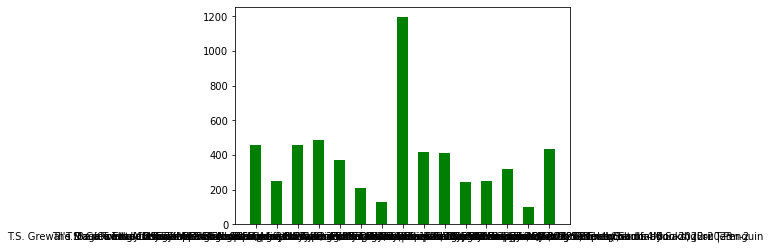

In [59]:
import matplotlib.pyplot as plt

def plotData(df):
    plt.bar(df['Product Name'], df['Price'], color ='green', width = 0.5)


plotData(sortedRating)

    

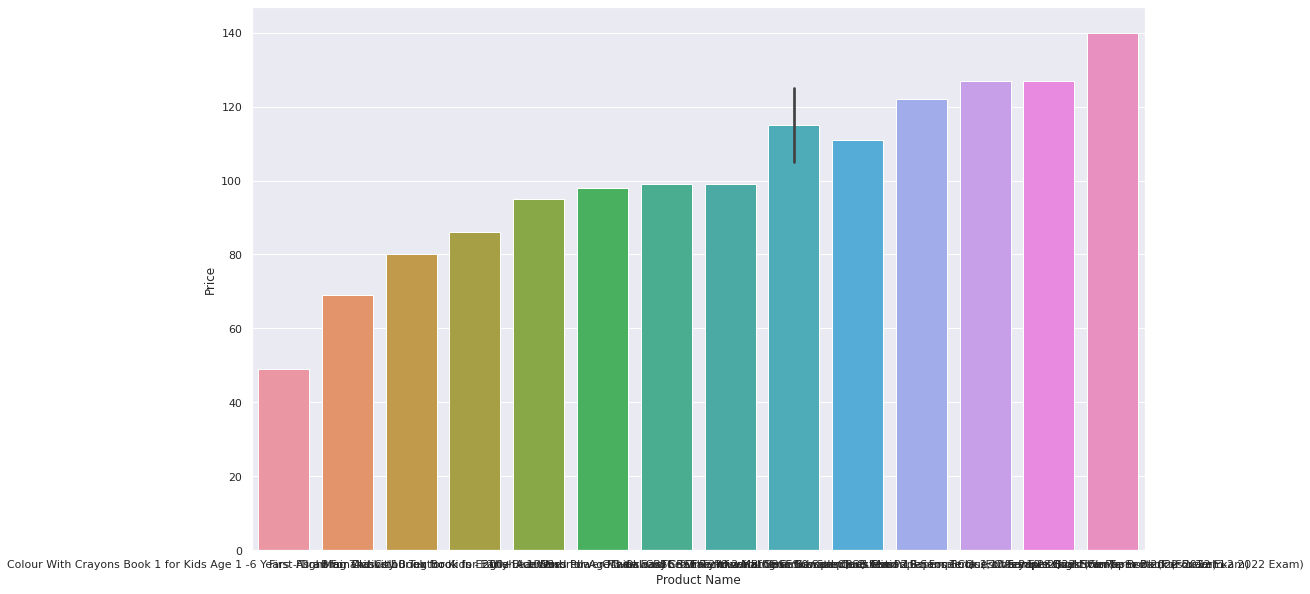

In [80]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(16,10)})
sns.barplot(x='Product Name', y='Price', data=sortedPrice)

In [ ]:
#  Future works
#  - choosing number of shops
# - specifying number of shops
#  - grow list of shops
#  - grow list of categories
# - Further analysis 
#  - Sentiment analysis

In [5]:
# Get Data From Walmart
# #  walmart link ttps://www.walmart.com/search?q=video+games&sort=best_seller&page=2&affinityOverride=default

def getWalmartData(category, pageNo):
    headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36'}

    # 'https://www.walmart.com/search?q='+str(category).lower()+'&sort=best_seller&page='+str(pageNo)+'&affinityOverride=default'

    content = requests.get("https://www.walmart.com/search/?query=rechargeable%20batteries",headers=headers).text
    # content = r.content
    soup = BeautifulSoup(content)
    print(soup)
    alls = []
    # for d in soup.findAll('div', attrs={'class':'sans-serif mid-gray relative flex flex-column w-100'}):
        # print(d)
    
        # name = d.find('span', attrs={'class':'f6 f5-l normal dark-gray mb0 mt1 lh-title'})
        # product_name = name.find_all('img', alt=True)
        # print(name)
              
    #     rating = d.find('span', attrs={'class':'a-icon-alt'})

    #     price = d.find('span', attrs={'class':'_p13n-zg-list-grid-desktop_price_p13n-sc-price__3mJ9Z'})
      
    #     all1 = []

    #     if name is not None:
    #         all1.append(product_name[0]['alt'])
    #     else:
    #         all1.append("unknown-product")

    #     if rating is not None:
    #         all1.append(rating.text)
    #     else:
    #         all1.append('-1')

    #     if price is not None:
    #         all1.append(price.text)
    #     else:
    #         all1.append('0')
    #     alls.append(all1)    
    return alls

print(getWalmartData("books",2))


<html lang="en">
<head>
<title>Robot or human?</title>
<meta content="width=device-width" name="viewport"/>
<style>
    #sign-in-widget a,
    #sign-in-widget a:active,
    #sign-in-widget a:hover {
        color: #000
    }

    #sign-in-widget h1 {
        font-weight: 500;
        font-size: 20px;
        font-size: 1.25rem;
        letter-spacing: -.6px;
        margin: 1px auto
    }

    @media (min-width:30em) {
        #sign-in-widget h1 {
            margin-top: 24px;
            font-size: 24px;
            font-size: 1.5rem
        }
    }

    #sign-in-widget {
        font-family: BogleWeb, Helvetica Neue, Helvetica, Arial, sans-serif
    }

    #sign-in-widget * {
        box-sizing: border-box
    }

    #sign-in-widget .text-right {
        text-align: right
    }

    @font-face {
        font-family: NewYorkIcons;
        src: url(6255ed72d86ece856725a2d80878bce6.eot);
        font-weight: 400;
        font-style: normal
    }

    @font-face {
        font-family: Ne

In [9]:
# Get data from on buy
# ebay link (https://www.ebay.ca/sch/i.html?_from=R40&_nkw=books&_sacat=0&LH_TitleDesc=0&_pgn=2)
import re
def getEbayData(category, pageNo):
    # headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.365'}
  
    # 'https://www.ebay.com/sch/i.html?_nkw=tv&_pgn=2'
    content = requests.get('https://www.ebay.ca/sch/i.html?_from=R40&_nkw='+str(category).lower()+'&_sacat=0&LH_TitleDesc=0&_pgn='+str(pageNo)).text
    # content = r.content
    soup = BeautifulSoup(content)
    # print(soup)
    item_name = []
    prices = []

    listings = soup.find_all('li', attrs={'class': 's-item'})

    alls = []
    for listing in listings:
        name = listing.find('h3', attrs={'class':"s-item__title"})

        rating = listing.find('div', attrs={'class':"x-star-rating"})
    
        price = listing.find('span', attrs={'class':"s-item__price"})

      
        all1 = []

        if name is not None:
            all1.append(name.text)
        else:
            all1.append("unknown-product")

        if rating is not None:
            all1.append(rating.text)
        else:
            all1.append('-1')

        if price is not None:
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls


print(getEbayData("books",1))

[['Shop on eBay', '-1', '$20.00'], ['The Holy Bible King James Version Gustave Dore Illustrated Leather Bound NEW', '5.0 out of 5 stars.', 'C $45.29'], ['NEW Yuval Noah Harari Collection 3 Books Set Sapiens, Homo Deus, 21 lessons.....', '-1', 'C $32.71'], ['SCRIBD - Scribd- SCRIBD - Scribd', '-1', 'C $11.49'], ['The Starseed Transmissions', '5.0 out of 5 stars.', 'C $9.64'], ['TOYOTA COROLLA 40 years history of Japanese Popular Car COROLLA fan ... japanese', '-1', 'C $162.30'], ['Rivet Counter Guide #1 - Corsair Cockpits: F4U-1 Family', '-1', 'C $44.05'], ['Monogatari Series Final Season Novel Box Set', '-1', 'C $110.39'], ['Mushoku Tensei (Light Novel) Vol. 15 (Paperback or Softback)', '-1', 'C $16.08'], ['Reynolds Robert Music Of The Bee Gees BOOK NEW', '-1', 'C $26.82'], ['Eye of the World, Hardcover by Jordan, Robert, Like New Used, Free shipping i...', '5.0 out of 5 stars.', 'C $38.79'], ['Art of Encanto HARDCOVER 2021 by Disney', '5.0 out of 5 stars.', 'C $49.02'], ['The Readers 

In [12]:
def generateEbayProductDataset(noPages, category):
    results = []
    for i in range(1, noPages+1):
        results.append(getEbayData(category,i))
    
    flatten = lambda l: [item for sublist in l for item in sublist]
    df = pd.DataFrame(flatten(results),columns=['Product Name','Rating','Price'])
    df['shop'] = "ebay"
    df['category'] = category

    print(df.head())
    df.to_csv('ebay_products.csv', index=False, encoding='utf-8')

generateEbayProductDataset(2,"books")

                                        Product Name               Rating  \
0                                       Shop on eBay                   -1   
1  The Holy Bible King James Version Gustave Dore...  5.0 out of 5 stars.   
2  NEW Yuval Noah Harari Collection 3 Books Set S...                   -1   
3                   SCRIBD - Scribd- SCRIBD - Scribd                   -1   
4     Reynolds Robert Music Of The Bee Gees BOOK NEW                   -1   

      Price  shop category  
0    $20.00  ebay    books  
1  C $45.29  ebay    books  
2  C $32.71  ebay    books  
3  C $11.49  ebay    books  
4  C $26.82  ebay    books  


In [14]:
def readProductDataset(filename):
    df = pd.read_csv(filename)
    return df

readProductDataset("ebay_products.csv").head(10)

,Product Name,Rating,Price,shop,category
0,Shop on eBay,-1,$20.00,ebay,books
1,The Holy Bible King James Version Gustave Dore...,5.0 out of 5 stars.,C $45.29,ebay,books
2,NEW Yuval Noah Harari Collection 3 Books Set S...,-1,C $32.71,ebay,books
3,SCRIBD - Scribd- SCRIBD - Scribd,-1,C $11.49,ebay,books
4,Reynolds Robert Music Of The Bee Gees BOOK NEW,-1,C $26.82,ebay,books
5,The Starseed Transmissions,5.0 out of 5 stars.,C $9.64,ebay,books
6,TOYOTA COROLLA 40 years history of Japanese Po...,-1,C $162.30,ebay,books
7,Rivet Counter Guide #1 - Corsair Cockpits: F4U...,-1,C $44.05,ebay,books
8,Mushoku Tensei (Light Novel) Vol. 15 (Paperbac...,-1,C $16.08,ebay,books
9,"Eye of the World, Hardcover by Jordan, Robert,...",5.0 out of 5 stars.,C $38.79,ebay,books
